# Credit Card Company's Customer Chruning EDA and Prediciton

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

## Import Libraries

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Import Data Set

In [200]:
df_dict = pd.read_excel('./BankChurners.xls', sheet_name='Dictionary')
df = pd.read_excel('./BankChurners.xls', sheet_name='BankChurners')
df_orig = df.copy()

In [201]:
df_dict.head(20)

Variable  \
0                  CLIENTNUM   
1             Attrition_Flag   
2               Customer_Age   
3                     Gender   
4            Dependent_count   
5            Education_Level   
6             Marital_Status   
7            Income_Category   
8              Card_Category   
9             Months_on_book   
10  Total_Relationship_Count   
11    Months_Inactive_12_mon   
12     Contacts_Count_12_mon   
13              Credit_Limit   
14       Total_Revolving_Bal   
15           Avg_Open_To_Buy   
16      Total_Amt_Chng_Q4_Q1   
17           Total_Trans_Amt   
18            Total_Trans_Ct   
19       Total_Ct_Chng_Q4_Q1   

                                          Description  
0   Client number. Unique identifier for the custo...  
1   Internal event (customer activity) variable - ...  
2      Demographic variable - Customer's Age in Years  
3             Demographic variable - M=Male, F=Female  
4         Demographic variable - Number of dependents  
5   Demographic variable - Educational Qualificati...  
6   Demographic variable - Married, Single, Divorc...  
7   Demographic variable - Annual Income Category ...  
8   Product Variable - Type of Card (Blue, Silver,...  
9                    Period of relationship with bank  
10         Total no. of products held by the customer  
11       No. of months inactive in the last 12 months  
12              No. of Contacts in the last 12 months  
13                    Credit Limit on the Credit Card  
14         Total Revolving Balance on the Credit Card  
15  Open to Buy Credit Line (Average of last 12 mo...  
16          Change in Transaction Amount (Q4 over Q1)  
17          Total Transaction Amount (Last 12 months)  
18           Total Transaction Count (Last 12 months)  
19           Change in Transaction Count (Q4 over Q1)

In [202]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

## Check for NAN

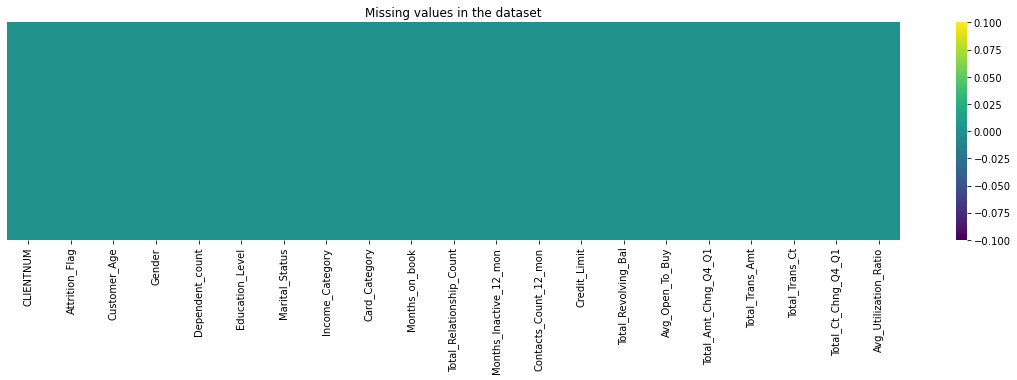

In [203]:
# pd.DataFrame(df.isna().value_counts())
plt.figure(figsize=(20,4))
sns.heatmap(df.isna(),cbar=True,cmap='viridis',yticklabels=False)
plt.title('Missing values in the dataset');

In [204]:
df.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

## Checking Outliers 

<AxesSubplot:>

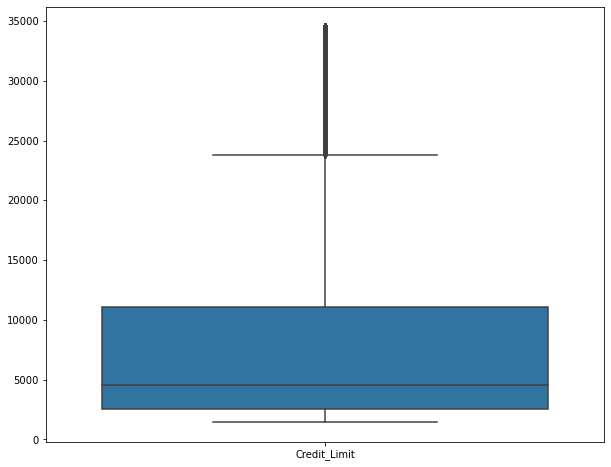

In [209]:
df_box = pd.DataFrame(df, columns=['Credit_Limit'])
sns.boxplot(data=df_box)

In [205]:
df.corr()

CLIENTNUM  Customer_Age  Dependent_count  \
CLIENTNUM                  1.000000      0.007613         0.006772   
Customer_Age               0.007613      1.000000        -0.122254   
Dependent_count            0.006772     -0.122254         1.000000   
Months_on_book             0.134588      0.788912        -0.103062   
Total_Relationship_Count   0.006907     -0.010931        -0.039076   
Months_Inactive_12_mon     0.005729      0.054361        -0.010768   
Contacts_Count_12_mon      0.005694     -0.018452        -0.040505   
Credit_Limit               0.005708      0.002476         0.068065   
Total_Revolving_Bal        0.000825      0.014780        -0.002688   
Avg_Open_To_Buy            0.005633      0.001151         0.068291   
Total_Amt_Chng_Q4_Q1       0.017369     -0.062042        -0.035439   
Total_Trans_Amt           -0.019692     -0.046446         0.025046   
Total_Trans_Ct            -0.002961     -0.067097         0.049912   
Total_Ct_Chng_Q4_Q1        0.007696     -0.012143         0.011087   
Avg_Utilization_Ratio      0.000266      0.007114        -0.037135   

                          Months_on_book  Total_Relationship_Count  \
CLIENTNUM                       0.134588                  0.006907   
Customer_Age                    0.788912                 -0.010931   
Dependent_count                -0.103062                 -0.039076   
Months_on_book                  1.000000                 -0.009203   
Total_Relationship_Count       -0.009203                  1.000000   
Months_Inactive_12_mon          0.074164                 -0.003675   
Contacts_Count_12_mon          -0.010774                  0.055203   
Credit_Limit                    0.007507                 -0.071386   
Total_Revolving_Bal             0.008623                  0.013726   
Avg_Open_To_Buy                 0.006732                 -0.072601   
Total_Amt_Chng_Q4_Q1           -0.048959                  0.050119   
Total_Trans_Amt                -0.038591                 -0.347229   
Total_Trans_Ct                 -0.049819                 -0.241891   
Total_Ct_Chng_Q4_Q1            -0.014072                  0.040831   
Avg_Utilization_Ratio          -0.007541                  0.067663   

                          Months_Inactive_12_mon  Contacts_Count_12_mon  \
CLIENTNUM                               0.005729               0.005694   
Customer_Age                            0.054361              -0.018452   
Dependent_count                        -0.010768              -0.040505   
Months_on_book                          0.074164              -0.010774   
Total_Relationship_Count               -0.003675               0.055203   
Months_Inactive_12_mon                  1.000000               0.029493   
Contacts_Count_12_mon                   0.029493               1.000000   
Credit_Limit                           -0.020394               0.020817   
Total_Revolving_Bal                    -0.042210              -0.053913   
Avg_Open_To_Buy                        -0.016605               0.025646   
Total_Amt_Chng_Q4_Q1                   -0.032247              -0.024445   
Total_Trans_Amt                        -0.036982              -0.112774   
Total_Trans_Ct                         -0.042787              -0.152213   
Total_Ct_Chng_Q4_Q1                    -0.038989              -0.094997   
Avg_Utilization_Ratio                  -0.007503              -0.055471   

                          Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
CLIENTNUM                     0.005708             0.000825         0.005633   
Customer_Age                  0.002476             0.014780         0.001151   
Dependent_count               0.068065            -0.002688         0.068291   
Months_on_book                0.007507             0.008623         0.006732   
Total_Relationship_Count     -0.071386             0.013726        -0.072601   
Months_Inactive_12_mon       -0.020394            -0.042210        -0.016605   
Contacts_Count_12_mon  

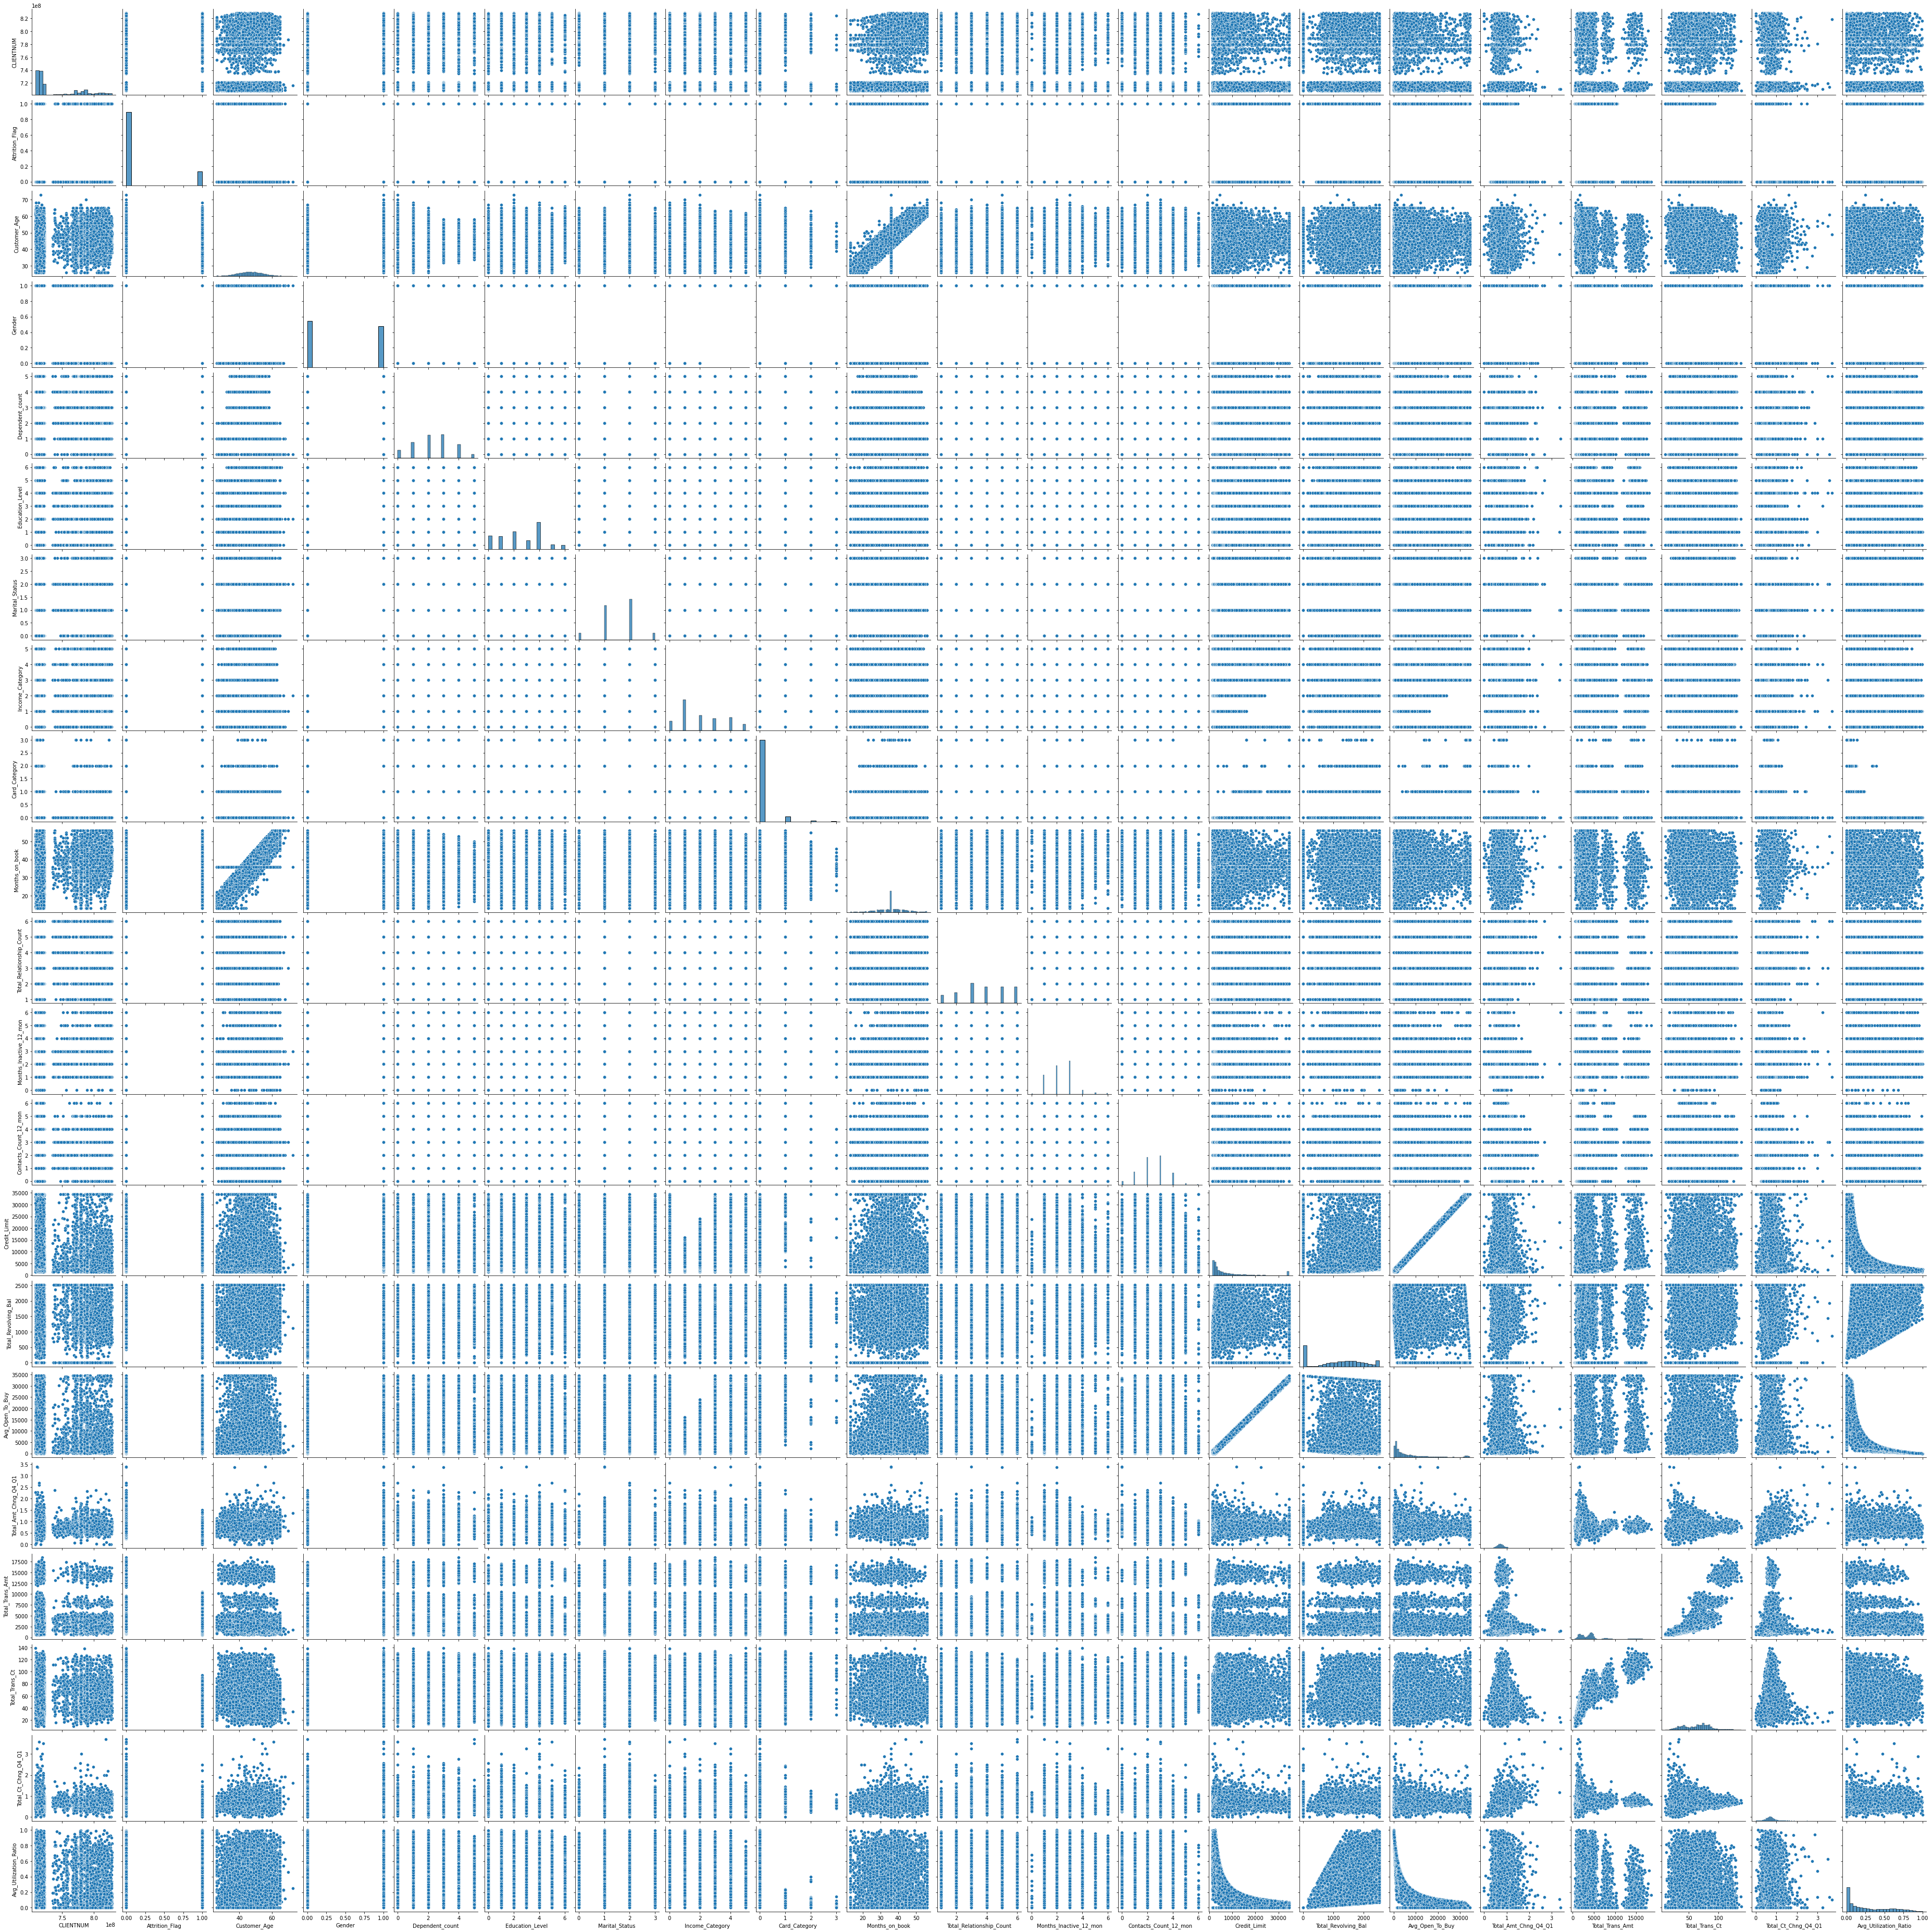

In [75]:
sns.pairplot(df)

In [206]:
# Replace categorical variables with numbers

# Existing Customer - 0
# Attrited Customer - 1
df.loc[df['Attrition_Flag'] == 'Attrited Customer', 'Attrition_Flag'] = 1
df.loc[df['Attrition_Flag'] == 'Existing Customer', 'Attrition_Flag'] = 0

# Male - 1
# Female - 0
df.loc[df['Gender'] == 'M', 'Gender'] = 1
df.loc[df['Gender'] == 'F', 'Gender'] = 0

# Divorced - 3
# Married - 2
# Single - 1
# Unknown - 0
df.loc[df['Marital_Status'] == 'Divorced', 'Marital_Status'] = 3
df.loc[df['Marital_Status'] == 'Married', 'Marital_Status'] = 2
df.loc[df['Marital_Status'] == 'Single', 'Marital_Status'] = 1
df.loc[df['Marital_Status'] == 'Unknown', 'Marital_Status'] = 0
print('Marital Status Unknown: ', len(df[df['Marital_Status'] == 0]))

# Doctorate - 6
# Post-Graduate - 5
# Graduate - 4
# College - 3
# High School - 2
# Uneducated - 1
# Unknown - 0
df.loc[df['Education_Level'] == 'Doctorate', 'Education_Level'] = 6
df.loc[df['Education_Level'] == 'Post-Graduate', 'Education_Level'] = 5
df.loc[df['Education_Level'] == 'Graduate', 'Education_Level'] = 4
df.loc[df['Education_Level'] == 'College', 'Education_Level'] = 3
df.loc[df['Education_Level'] == 'High School', 'Education_Level'] = 2
df.loc[df['Education_Level'] == 'Uneducated', 'Education_Level'] = 1
df.loc[df['Education_Level'] == 'Unknown', 'Education_Level'] = 0
print('Education Level Unknown: ', len(df[df['Education_Level'] == 0]))

# Platinum - 3
# Gold - 2
# Silver - 1
# Blue - 0
df.loc[df['Card_Category'] == 'Platinum', 'Card_Category'] = 3
df.loc[df['Card_Category'] == 'Gold', 'Card_Category'] = 2
df.loc[df['Card_Category'] == 'Silver', 'Card_Category'] = 1
df.loc[df['Card_Category'] == 'Blue', 'Card_Category'] = 0


# $120K + - 5
# $80K - $120K - 4
# $60K - $80K - 3
# $40K - $60K - 2
# Less than $40K - 1
# Unknown - 0
df.loc[df['Income_Category'] == '$120K +', 'Income_Category'] = 5
df.loc[df['Income_Category'] == '$80K - $120K', 'Income_Category'] = 4
df.loc[df['Income_Category'] == '$60K - $80K', 'Income_Category'] = 3
df.loc[df['Income_Category'] == '$40K - $60K', 'Income_Category'] = 2
df.loc[df['Income_Category'] == 'Less than $40K', 'Income_Category'] = 1
df.loc[df['Income_Category'] == 'Unknown', 'Income_Category'] = 0
print('Income Category Unknown: ', len(df[df['Income_Category'] == 0]))


Marital Status Unknown:  749
Education Level Unknown:  1519
Income Category Unknown:  1112


In [207]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [128]:
df['Attrition_Flag'] = df['Attrition_Flag'].astype('int64')
df['Gender'] = df['Gender'].astype('int64')
df['Education_Level'] = df['Education_Level'].astype('int64')
df['Marital_Status'] = df['Marital_Status'].astype('int64')
df['Income_Category'] = df['Income_Category'].astype('int64')
df['Card_Category'] = df['Card_Category'].astype('int64')

CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0      768805383               0            45       1                3   
1      818770008               0            49       0                5   
2      713982108               0            51       1                3   
3      769911858               0            40       0                4   
4      709106358               0            40       1                3   
...          ...             ...           ...     ...              ...   
10122  772366833               0            50       1                2   
10123  710638233               1            41       1                2   
10124  716506083               1            44       0                1   
10125  717406983               1            30       1                2   
10126  714337233               1            43       0                2   

       Education_Level  Marital_Status  Income_Category  Card_Category  \
0                    2               2                2              0   
1                    4               1                1              0   
2                    4               2                3              0   
3                    2               0                1              0   
4                    1               2                2              0   
...                ...             ...              ...            ...   
10122                4               1                1              0   
10123                0               3                1              0   
10124                2               2                1              0   
10125                4               0                1              0   
10126                4               2                1              1   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  39  ...                       1                      3   
1                  44  ...                       1                      2   
2                  36  ...                       1                      0   
3                  34  ...                       4                      1   
4                  21  ...                       1                      0   
...               ...  ...                     ...                    ...   
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0           12691.0                  777          11914.0   
1            8256.0                  864           7392.0   
2            3418.0                    0           3418.0   
3            3313.0                 2517            796.0   
4            4716.0                    0           4716.0   
...             ...                  ...              ...   
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                     1.335             1144              42   
1                     1.541             1291              33   
2                     2.594             1887              20   
3                     1.405             1171              20   
4                     2.175              816              28   
...                     ...              ...             ...   
10122                 0.703            15476             117   
10123                 0.804             8764   

In [208]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

<AxesSubplot:>

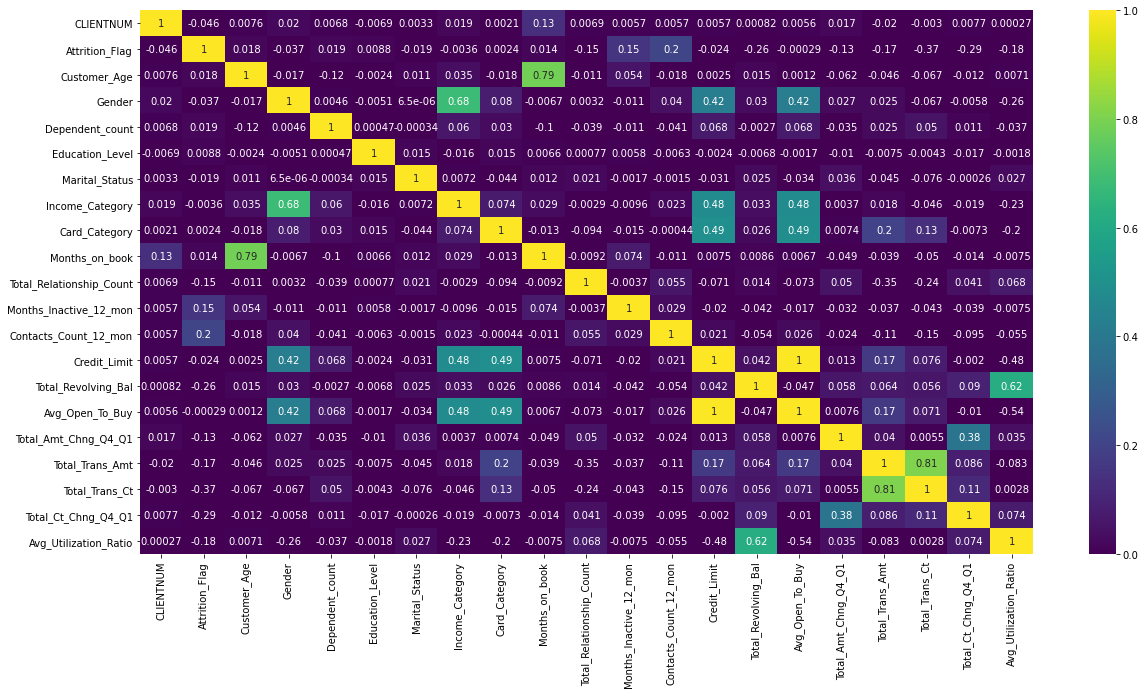

In [144]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), vmin=0, vmax=1, annot=True, cmap='viridis')

**We can see that there is strong relationship between below:**

1. **Months_Inactive_12_mon <--> Attrition_Flag**
2. **Contacts_Count_12_mon <--> Attrition_Flag**
3. Months_on_book <--> Customer_Age
4. Income_Category <--> Gender
5. Credit_Limit <--> Gender
6. Avg_Open_To_Buy <--> Gender
7. Credit_Limit <--> Income_Category
8. Credit_Limit <--> Card_Category
9. Avg_Open_To_Buy <--> Income_Category
10. Avg_Open_To_Buy <--> Card_Category
11. Avg_Open_To_Buy <--> Credit_Limit
12. Avg_Utilization_Ratio <--> Total_Revolving_Bal
13. Total_Trans_ct <--> Total_trans_Amt

array([[<AxesSubplot:title={'center':'Attrition_Flag'}>,
        <AxesSubplot:title={'center':'Customer_Age'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Dependent_count'}>],
       [<AxesSubplot:title={'center':'Education_Level'}>,
        <AxesSubplot:title={'center':'Marital_Status'}>,
        <AxesSubplot:title={'center':'Income_Category'}>,
        <AxesSubplot:title={'center':'Card_Category'}>],
       [<AxesSubplot:title={'center':'Months_on_book'}>,
        <AxesSubplot:title={'center':'Months_Inactive_12_mon'}>,
        <AxesSubplot:title={'center':'Contacts_Count_12_mon'}>,
        <AxesSubplot:title={'center':'Credit_Limit'}>],
       [<AxesSubplot:title={'center':'Total_Revolving_Bal'}>,
        <AxesSubplot:title={'center':'Avg_Open_To_Buy'}>,
        <AxesSubplot:title={'center':'Total_Amt_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Total_Trans_Amt'}>],
       [<AxesSubplot:title={'center':'Total_Trans_Ct'}>,
        <

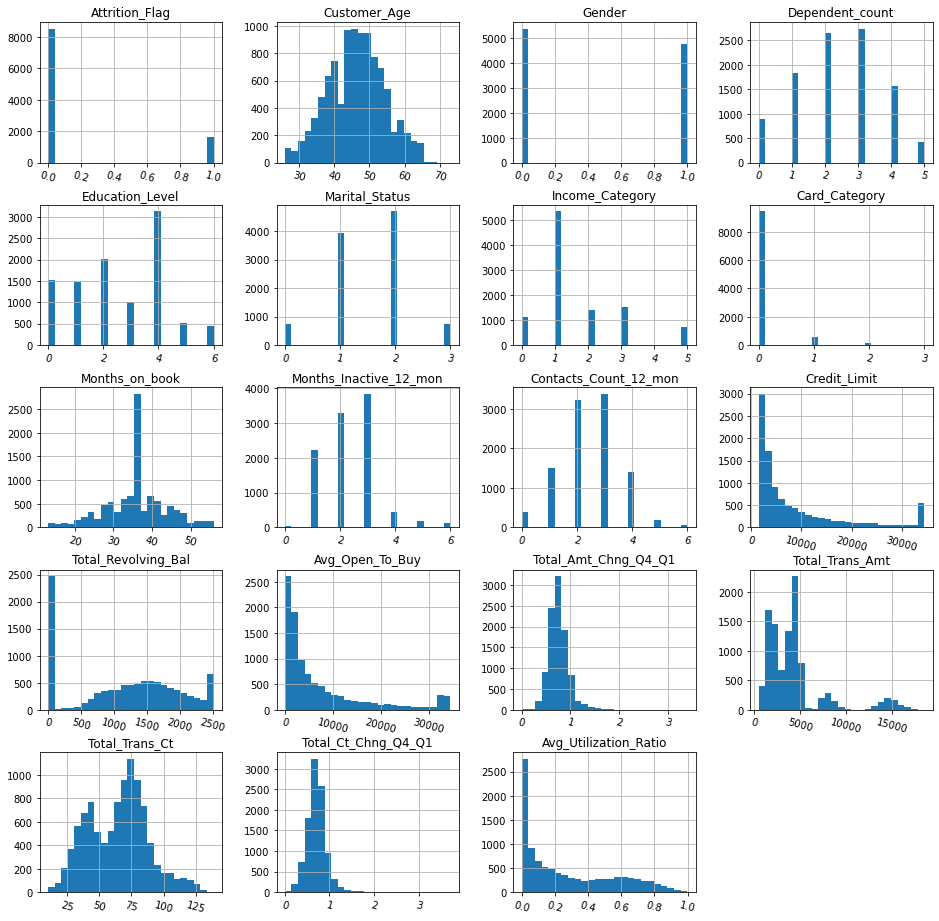

In [172]:
df.hist(figsize=(16,16), xrot=-15, bins=25, column=['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
                                                   'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
                                                   'Months_on_book', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
                                                   'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'], )

## Relation Plots with Target variable

[Text(0, 0, 'Existing Customer'), Text(1, 0, 'Attrited Customer')]

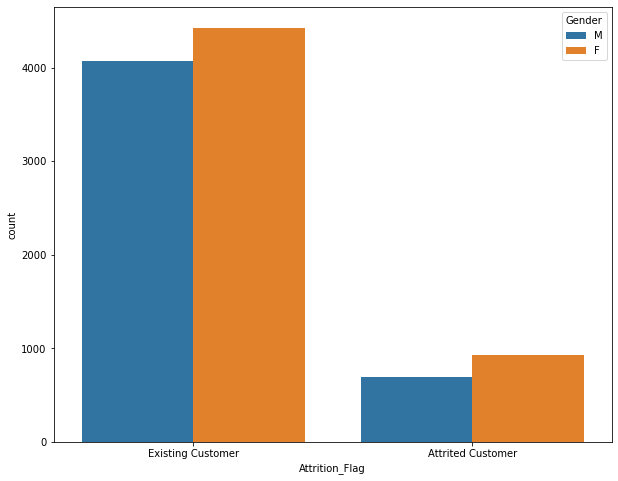

In [170]:
ax = sns.countplot(x='Attrition_Flag', hue='Gender', data=df_orig)
ax.set_xticklabels(ax.get_xticklabels())

[Text(0, 0, 'Existing Customer'), Text(1, 0, 'Attrited Customer')]

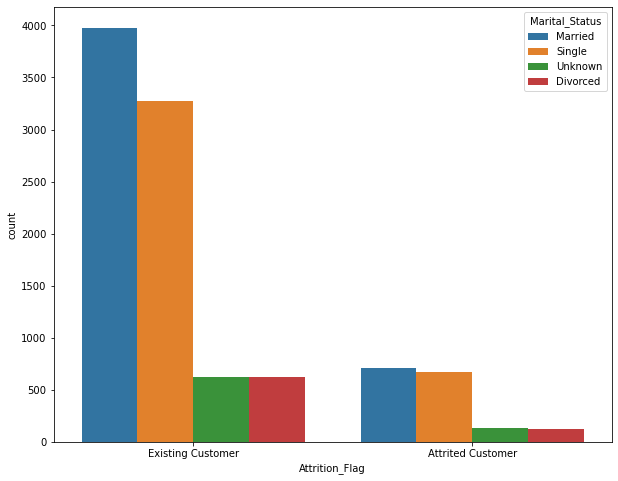

In [174]:
ax = sns.countplot(x='Attrition_Flag', hue='Marital_Status', data=df_orig)
ax.set_xticklabels(ax.get_xticklabels())

[Text(0, 0, 'Existing Customer'), Text(1, 0, 'Attrited Customer')]

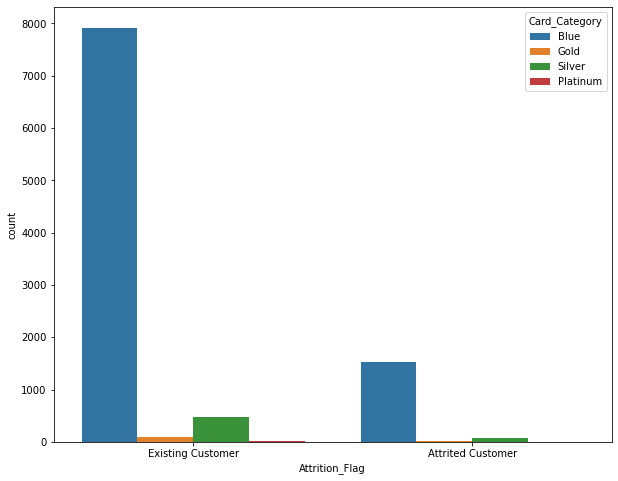

In [175]:
ax = sns.countplot(x='Attrition_Flag', hue='Card_Category', data=df_orig)
ax.set_xticklabels(ax.get_xticklabels())

[Text(0, 0, 'Existing Customer'), Text(1, 0, 'Attrited Customer')]

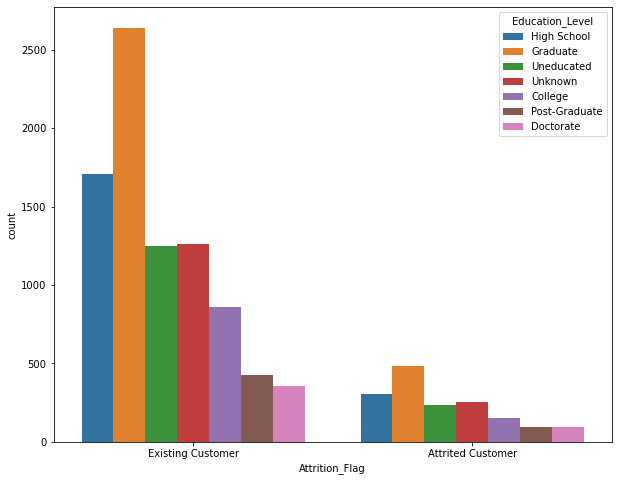

In [176]:
ax = sns.countplot(x='Attrition_Flag', hue='Education_Level', data=df_orig)
ax.set_xticklabels(ax.get_xticklabels())